<a href="https://colab.research.google.com/github/RabiaBabar/Deep-Learning---Computer-Vision/blob/Assignment-2---AI-%26-Computer-Vision/Rabia_Assignment2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Confirming mount location
current_directory = '/content'

%cd /content/drive/MyDrive/data_assign_2/hand_written_digits



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/data_assign_2/hand_written_digits


In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define directory path to your dataset
data_directory = "/content/drive/MyDrive/data_assign_2/hand_written_digits"



In [4]:
# Set parameters for data loader
batch_size_vgg16 = 32
img_height_vgg16 = 100
img_width_vgg16 = 100

train_data_vgg16 = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    labels='inferred',
    label_mode='int',  # 'binary' for two classes,'categorical' for multi-classes
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_width_vgg16, img_height_vgg16),
    batch_size=batch_size_vgg16,
)

validation_data_vgg16 = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    labels='inferred',
    label_mode='int',  # Change to 'binary' if you have two classes
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_width_vgg16, img_height_vgg16),
    batch_size=batch_size_vgg16,
)



Found 4668 files belonging to 3 classes.
Using 3735 files for training.
Found 4668 files belonging to 3 classes.
Using 933 files for validation.


**Transfer Learning Models - vGG16**

In [5]:

# Load the base VGG16 model, excluding the top classification layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_height_vgg16, img_width_vgg16, 3))

# Freeze the layers of the base model
for layer_vgg16 in base_model_vgg16.layers:
    layer_vgg16.trainable = False

# Add new top layers
x_vgg16 = Flatten()(base_model_vgg16.output)
x_vgg16 = Dense(128, activation='relu')(x_vgg16)
x_vgg16 = Dropout(0.5)(x_vgg16)
predictions_vgg16 = Dense(3, activation='softmax')(x_vgg16)  # Assuming 3 classes

# Create a new model by combining pre-trained VGG16 with your own top layers
model_transfer_learning_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions_vgg16)

# Compile the model
model_transfer_learning_vgg16.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                                      loss='sparse_categorical_crossentropy',
                                      metrics=['accuracy'])



In [6]:
# Display the model summary
model_transfer_learning_vgg16.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [7]:
# Set the initial number of epochs
initial_epochs_vgg16 = 10  # Adjust as per your requirement

# Train the model
history_vgg16 = model_transfer_learning_vgg16.fit(
    train_data_vgg16,
    validation_data=validation_data_vgg16,
    epochs=initial_epochs_vgg16
)


Epoch 1/10
117/117 [==============================] - 609s 5s/step - loss: 8.5161 - accuracy: 0.5055 - val_loss: 0.4783 - val_accuracy: 0.9035
Epoch 2/10
117/117 [==============================] - 595s 5s/step - loss: 3.3890 - accuracy: 0.7210 - val_loss: 0.1826 - val_accuracy: 0.9593
Epoch 3/10
117/117 [==============================] - 593s 5s/step - loss: 1.7027 - accuracy: 0.8380 - val_loss: 0.1519 - val_accuracy: 0.9700
Epoch 4/10
117/117 [==============================] - 597s 5s/step - loss: 1.2015 - accuracy: 0.8787 - val_loss: 0.1262 - val_accuracy: 0.9786
Epoch 5/10
117/117 [==============================] - 592s 5s/step - loss: 0.9295 - accuracy: 0.9033 - val_loss: 0.1125 - val_accuracy: 0.9850
Epoch 6/10
117/117 [==============================] - 595s 5s/step - loss: 0.7318 - accuracy: 0.9266 - val_loss: 0.1075 - val_accuracy: 0.9861
Epoch 7/10
117/117 [==============================] - 605s 5s/step - loss: 0.6361 - accuracy: 0.9336 - val_loss: 0.0912 - val_accuracy: 0.9871

In [10]:
# Evaluate the model
val_loss_vgg16, val_accuracy_vgg16 = model_transfer_learning_vgg16.evaluate(validation_data_vgg16)
print(f'Validation accuracy: {val_accuracy_vgg16 * 100:.2f}%')


30/30 [==============================] - 113s 4s/step - loss: 0.0837 - accuracy: 0.9871
Validation accuracy: 98.71%


In [9]:
# Save the trained model
model_transfer_learning_vgg16.save('/content/drive/MyDrive/VGG16_TransferLearning.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Fine-tuning the model**

In [11]:
# Unfreeze some top layers of the base model
base_model_vgg16.trainable = True
fine_tune_at_vgg16 = 100  # This is an example, adjust based on your model's architecture

# Freeze all the layers before the 'fine_tune_at' layer
for layer_vgg16 in base_model_vgg16.layers[:fine_tune_at_vgg16]:
    layer_vgg16.trainable = False

# Recompile the model with a lower learning rate
model_transfer_learning_vgg16.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate
                                      loss='sparse_categorical_crossentropy',
                                      metrics=['accuracy'])

# Continue training
fine_tune_epochs_vgg16 = 5
total_epochs_vgg16 = initial_epochs_vgg16 + fine_tune_epochs_vgg16

history_fine_vgg16 = model_transfer_learning_vgg16.fit(train_data_vgg16,
                                                       validation_data=validation_data_vgg16,
                                                       epochs=total_epochs_vgg16,
                                                       initial_epoch=history_vgg16.epoch[-1])



Epoch 10/15
117/117 [==============================] - 598s 5s/step - loss: 0.3051 - accuracy: 0.9676 - val_loss: 0.0755 - val_accuracy: 0.9893
Epoch 11/15
117/117 [==============================] - 603s 5s/step - loss: 0.2685 - accuracy: 0.9705 - val_loss: 0.0684 - val_accuracy: 0.9904
Epoch 12/15
117/117 [==============================] - 597s 5s/step - loss: 0.2589 - accuracy: 0.9719 - val_loss: 0.0661 - val_accuracy: 0.9904
Epoch 13/15
117/117 [==============================] - 613s 5s/step - loss: 0.1542 - accuracy: 0.9772 - val_loss: 0.0672 - val_accuracy: 0.9893
Epoch 14/15
117/117 [==============================] - 603s 5s/step - loss: 0.1461 - accuracy: 0.9805 - val_loss: 0.0645 - val_accuracy: 0.9893
Epoch 15/15
117/117 [==============================] - 595s 5s/step - loss: 0.1471 - accuracy: 0.9826 - val_loss: 0.0620 - val_accuracy: 0.9904


In [12]:
# Combine the history from initial training and fine-tuning
total_history_vgg16 = {
    'accuracy': history_vgg16.history['accuracy'] + history_fine_vgg16.history['accuracy'],
    'val_accuracy': history_vgg16.history['val_accuracy'] + history_fine_vgg16.history['val_accuracy'],
    'loss': history_vgg16.history['loss'] + history_fine_vgg16.history['loss'],
    'val_loss': history_vgg16.history['val_loss'] + history_fine_vgg16.history['val_loss'],
}



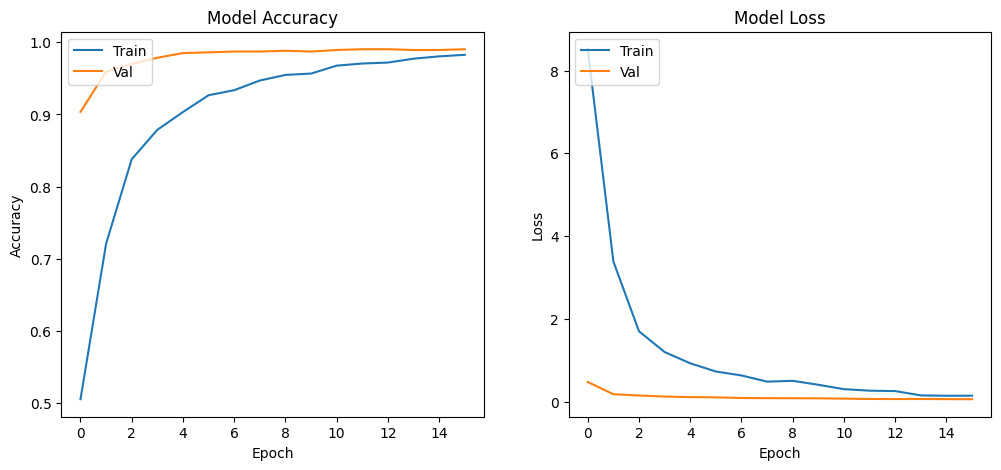

In [13]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(total_history_vgg16['accuracy'])
plt.plot(total_history_vgg16['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(total_history_vgg16['loss'])
plt.plot(total_history_vgg16['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()
